In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh

#np.set_printoptions(threshold=np.inf)


In [46]:
# Function to read edges from a file
def read_edges_from_file(filename):
    edges = []
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            edges.append((int(nodes[0]), int(nodes[1])))
    return edges

# Function to read features from a file
def read_features_from_file(filename):
    features = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            node = int(parts[0])  # First number is the node ID
            feature_vector = np.array(list(map(int, parts[1:])))  # Rest are features
            features[node] = feature_vector
    return features

# Gaussian kernel similarity
def gaussian_similarity(x, y, sigma=1.0):
    diff = x - y
    distance = np.dot(diff, diff)  # Squared Euclidean distance
    # return np.exp(-distance / (2 * sigma ** 2))
    return np.exp(-sigma * distance)

# Create weighted adjacency matrix with Gaussian kernel weights
def create_weighted_adjacency_matrix(edges, features, node_mapping, sigma=1.0):
    size = len(node_mapping)
    A = np.zeros((size, size), dtype=float)
    for u, v in edges:
            u_idx, v_idx = node_mapping[u], node_mapping[v]
            weight = gaussian_similarity(features[u], features[v], sigma)
            A[u_idx, v_idx] = weight
            A[v_idx, u_idx] = weight  # For undirected graph
    return A

# Create degree matrix based on the number of non-zero values in each row
def create_degree_matrix(adjacency_matrix):
    # degrees = np.count_nonzero(adjacency_matrix, axis=1)  # Count non-zero entries in each row
    degrees = np.sum(adjacency_matrix, axis=1)  # Sum weights in each row
    D = np.diag(degrees)  # Create diagonal degree matrix
    return D

# Create Laplacian matrix
def create_laplacian_matrix(A, D):
    return D - A

# Compute eigenvalues and eigenvectors and sort them in increasing order based on eigen values
def analyze_laplacian(L):
    eigenvalues, eigenvectors = eigh(L)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues[:100], sorted_eigenvectors

In [47]:
import os
# def addMainNode(current_working_directory, central_node, edges, features, unique_nodes):
#     mainNodeFeaturesPath = os.path.join(current_working_directory, "dataset", f"{central_node}.egofeat")
#     with open(mainNodeFeaturesPath, 'r') as file:
#         for line in file:
#             parts = line.strip().split()
#             feature_vector = np.array(list(map(int, parts)))
#             #print(feature_vector)
#     features[central_node] = feature_vector
#     for node in unique_nodes:
#         edges.append((central_node, int(node)))
#     unique_nodes.append(central_node)
#     return edges, features, unique_nodes


### Reading features and edges from the files

In [82]:
# Main execution
central_node = 0

current_working_directory = os.getcwd()
edges_path = os.path.join(current_working_directory, "dataset", f"{central_node}.edges")
features_path = os.path.join(current_working_directory, "dataset", f"{central_node}.feat")

# Read edges and features
edges = read_edges_from_file(edges_path)
features = read_features_from_file(features_path)

# Map original node IDs to contiguous indices
unique_nodes = list(features.keys())

In [83]:
#edges, features, unique_nodes = addMainNode(current_working_directory, central_node, edges, features, unique_nodes)

In [84]:
node_mapping = {node: idx for idx, node in enumerate(unique_nodes)}

# Print information
no_nodes = len(unique_nodes)
print(f"Number of nodes: {no_nodes}")
print(f"Number of features per node: {len(next(iter(features.values())))}")

Number of nodes: 347
Number of features per node: 224


In [85]:
print(node_mapping)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119, 121: 120, 122: 12

In [86]:
print(f"First 5 edges: {edges[:-5:-1]}")
print(f"First 5 features of first node: {features[unique_nodes[0]][:5]}")

First 5 edges: [(291, 339), (98, 332), (85, 75), (326, 20)]
First 5 features of first node: [0 0 0 0 0]


In [87]:
# Create weighted adjacency matrix
A = create_weighted_adjacency_matrix(edges, features, node_mapping, sigma=.1)

# Create degree and Laplacian matrices
D = create_degree_matrix(A)
L = create_laplacian_matrix(A, D)

print(f"Size of Laplacian matrix: {len(L)} x {len(L[0])}")
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = analyze_laplacian(L)

# Example output
print("Eigenvalues:", eigenvalues[:5])  # Print the first few eigenvalues
print(f"Eigen shape {len(eigenvectors)} x {len(eigenvectors[0])}")

Size of Laplacian matrix: 347 x 347
Eigenvalues: [-9.18270083e-15 -2.42710492e-15 -1.71903166e-15 -4.44089210e-16
 -2.18402523e-16]
Eigen shape 347 x 347


In [88]:
if np.array_equal(L, L.T):
    print("The matrix A is symmetric.")
else:
    print("The matrix A is not symmetric.")

The matrix A is symmetric.


Largest Eigen Gap: 0.060964118313352356
Index of Largest Gap: 63


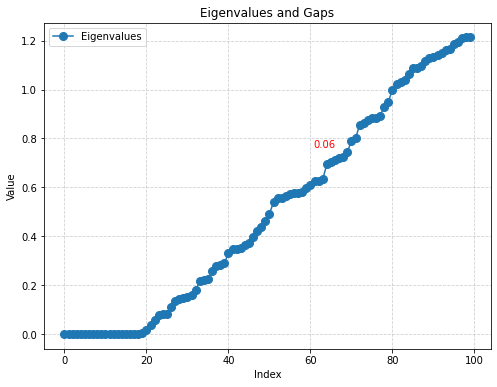

In [89]:
# Step 2: Compute the gaps between consecutive eigenvalues
eigen_gaps = np.diff(eigenvalues)

# Step 3: Find the largest eigen gap and its position
largest_gap = np.max(eigen_gaps)
gap_index = np.argmax(eigen_gaps)

#print("Eigen Gaps:", eigen_gaps)
print("Largest Eigen Gap:", largest_gap)
print("Index of Largest Gap:", gap_index)

# Plot the eigenvalues and the gaps
plt.figure(figsize=(8, 6))

# Plot eigenvalues as points
plt.plot(eigenvalues, 'o-', label="Eigenvalues", markersize=8)

# Annotate gaps
for i in range(len(eigen_gaps)):
    x_pos = i + 0.5  # Position between two eigenvalues
    y_pos = (eigenvalues[i] + eigenvalues[i + 1]) / 2  # Midpoint for the text
    if eigen_gaps[i] == largest_gap:
        plt.annotate(f"{eigen_gaps[i]:.2f}", xy=(x_pos, y_pos), xytext=(x_pos, y_pos + 0.1), ha="center", color="red")

# Enhance plot
plt.title("Eigenvalues and Gaps")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [90]:
# Select the eigenvectors corresponding to the smallest k eigenvalues
k = gap_index
selected_eigenvectors = eigenvectors[:, :k]

In [91]:
print(f"shape of selected Eigen vectors {len(selected_eigenvectors)} x {len(selected_eigenvectors[0])}")

shape of selected Eigen vectors 347 x 63


In [92]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(selected_eigenvectors)
labels = kmeans.labels_

In [93]:
print(labels)

[ 0  8  0  6  0  3  0 10  0  0 21 17  0  8 24  0  8 25  8  8  0  0  0 60
  0  0  0  8  0  0  0  8  5 29 51 60 11  0  0  0  8  5  7  8  0 13 39 60
 43  0  0 49 60  0  0  0 60 57  0  0  0  0 37 41  0  0  0 13  0 45 20  0
 60  2  0 30  0  6  0 60 53  0  0  0  0 13  0  0  3 14 10 60  8 60  3  0
 58  0 13 41 60 13  0  0  0  0 57  0  0 10  8 28  0 26  8  8  0  0  0 48
  0  0  0 56  0  0 60  0  0  0 13  0  0  0 60  0  8 36 60  8  0  0 13  8
 14  0  3  0  8 41  8 23  0 61 56  0 56  0  0 44  0  8 41 60  0 47  8  0
  0  0 41  0 47 28 13  0 13  0 14 60  6 58 35  0  0  0 60  0 41  0 60  0
 10 60  6 60  0 34  0  0 10 47  0 60 59 31 33  0 15 19  0  0  0  8 12  8
 41  6  3  8  0  0  0  0 13  8 13 42  0  0  0  0  9 32  0  0  0  0  0 52
 62 60  8  4 10  0  1  0 60  0  0  0 58 60 43  9  0  0 10  0  0  8 13 10
  0 60 55  0 53 30  0  0  6  0  6  0  0 13 54  0  0  4 40  0  0 27 18  0
  8  0  0 16 28  0  0 13  0  0 60 60 39 60  0  0  8  6 50  0 60  8  0  8
  0  0  0 38 60  0  3 60 13  0  0  0  0  8  3  6  0

In [ ]:
def visulaizeWithCentralNode():
    # Map the nodes from unique_nodes to their corresponding cluster labels
    node_colors = [labels[node_mapping[node]] for node in unique_nodes]

    # Create the graph
    G = nx.Graph()

    # Add edges to the graph
    G.add_edges_from(edges)

    # Add isolated nodes to the graph (those with no edges)
    isolated_nodes = set(unique_nodes) - set(G.nodes)
    G.add_nodes_from(isolated_nodes)

    # # Add a central node and connect it to all other nodes
    central_node = str(central_node)
    G.add_node(central_node)

    # Assign a default cluster label to the central node (e.g., choose a random label)
    default_label =  0 # Or use another strategy for default assignment

    # Ensure the graph nodes and node_colors are aligned
    # node_colors = [labels[node_mapping[node]] for node in G.nodes]
    node_colors = [labels[node_mapping[node]] for node in G.nodes if node != central_node]
    node_colors.append(default_label)  # Assign the central node a default label

    # # Add edges from central node to all other nodes
    for node in unique_nodes:
        G.add_edge(central_node, node)

    # Visualization
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)

    # Adjust node size to make the central node bigger
    node_size = [500 if node == central_node else 100 for node in G.nodes]

    # Draw the graph with node colors based on the clusters
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap("tab10", k), 
            node_size=node_size, font_size=10, font_weight='bold')

    plt.title("Graph Visualization with K-Means Clustering and Central Node")
    plt.show()

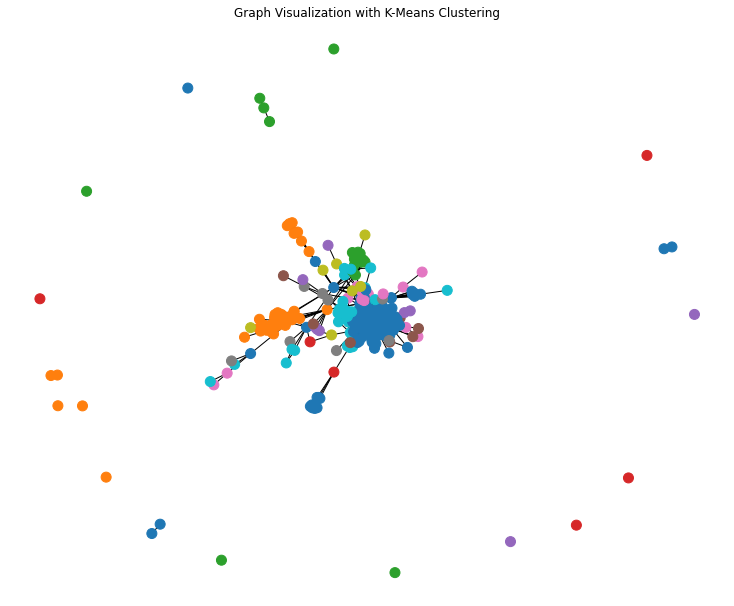

In [104]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

# Create the graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from(edges)

# Add isolated nodes to the graph (those with no edges)
isolated_nodes = set(unique_nodes) - set(G.nodes)
G.add_nodes_from(isolated_nodes)

node_colors = [labels[node_mapping[node]] for node in G.nodes]

# Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Adjust node size to make the central node bigger
node_size = [100 for node in G.nodes]

# Draw the graph with node colors based on the clusters
nx.draw(G, pos, with_labels=False, node_color=node_colors, cmap=plt.cm.get_cmap("tab10", k), 
        node_size=node_size, font_size=10, font_weight='bold')

plt.title("Graph Visualization with K-Means Clustering")
plt.show()



In [106]:
import numpy as np
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score
from collections import defaultdict

def load_ground_truth(file_path):
    """Load ground truth circles from nodeId.circles file."""
    ground_truth = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split("\t")
            circle_name = parts[0][6:]
            circle_members = list(map(int, parts[1:]))
            ground_truth[circle_name] = circle_members
    return ground_truth

def evaluate_clustering(graph, labels, ground_truth):
    """Evaluate clustering using multiple metrics."""
    node_mapping = {node: idx for idx, node in enumerate(graph.nodes())}
    num_nodes = len(node_mapping)

    ground_truth_labels = -1 * np.ones(num_nodes, dtype=int)
    for circle_id, members in enumerate(ground_truth.values()):
        for member in members:
            if member in node_mapping:  # Map member to its index
                ground_truth_labels[node_mapping[member]] = circle_id


    if len(set(labels)) > 1:
        silhouette = silhouette_score(nx.to_numpy_array(graph), labels)
    else:
        silhouette = float("nan")

    valid_indices = ground_truth_labels != -1  # Exclude nodes not in ground truth
    nmi = normalized_mutual_info_score(ground_truth_labels[valid_indices], labels[valid_indices])
    ari = adjusted_rand_score(ground_truth_labels[valid_indices], labels[valid_indices])

    modularity_ = nx.algorithms.community.modularity(graph, nx.algorithms.community.label_propagation_communities(graph))
    modularity_ = modularity_ if not np.isnan(modularity_) else 0

    return {
        "silhouette_score": silhouette,
        "nmi": nmi,
        "ari": ari,
        "modularity": modularity_
    }

ground_truth_path = os.path.join(current_working_directory, "dataset", f"{central_node}.circles")
ground_truth = load_ground_truth(ground_truth_path)
evaluate_clustering(G, labels, ground_truth)



{'silhouette_score': -0.3791467044411227,
 'nmi': 0.2365831807481612,
 'ari': -0.007986897710783291,
 'modularity': 0.4014451660039516}